In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set()

In [2]:
# Path to the files
train_data_path = os.getcwd() + '/train.csv'

# Training dataset
train_data = pd.read_csv(train_data_path)

# View the first 5 records
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Dataset variables
# PassengerId - Passeger ID
# Survived - Whether the passenger survived or not (0 - No, 1 - Yes)
# Pclass - Passenger class (1 - First, 2 - Second, 3 - Third)
# Name - Name of the passenger (Referred by their titles)
# Sex - Gender of the passenger (Male, Female)
# Age - Age of the passeger (0.42 to 80)
# SibSp - Number of siblings/Spouses aboard (0, 1, 2, 3, 4, 5, 8)
# Parch - Number of parents/children aboard (0, 1, 2, 3, 4, 5, 6)
# Ticket - Ticket number **
# Fare - Passenger fare in British pound **
# Cabin - Cabin **
# Embarked - Port of embarkation (C - Cherbourg, Q - Queenstown, S - Southampton, Nan)

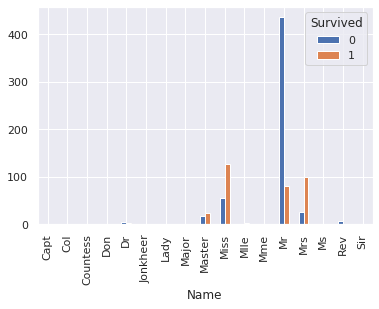

In [4]:
# Names of passengers

# Replace the names with titles
def title(name):
    regex = re.compile('\s+')
    name_list = regex.split(name)
    
    if 'Mr.' in name_list:
        return 'Mr'
    elif 'Mrs.' in name_list:
        return 'Mrs'
    elif 'Miss.' in name_list:
        return 'Miss'
    elif 'Master.' in name_list:
        return 'Master'
    elif 'Major.' in name_list:
        return 'Major'
    elif 'Ms.' in name_list:
        return 'Ms'
    elif 'Rev.' in name_list:
        return 'Rev'
    elif 'Mme.' in name_list:
        return 'Mme'
    elif 'Mlle.' in name_list:
        return 'Mlle'
    elif 'Capt.' in name_list:
        return 'Capt'
    elif 'Countess.' in name_list:
        return 'Countess'
    elif 'Jonkheer.' in name_list:
        return 'Jonkheer'
    elif 'Dr.' in name_list:
        return 'Dr'
    elif 'Col.' in name_list:
        return 'Col'
    elif 'Don.' in name_list:
        return 'Don'
    elif 'Lady.' in name_list:
        return 'Lady'
    elif 'Sir.' in name_list:
        return 'Sir'
    
train_data['Name'] = train_data['Name'].apply(title)

names_survived = train_data.groupby(['Name', 'Survived']) ['Survived'].count()
names_survived.unstack().plot.bar()

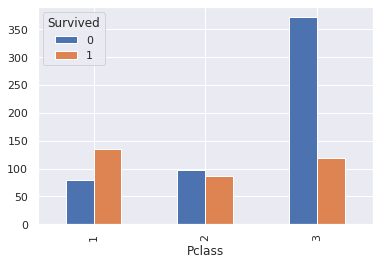

In [5]:
# Passenger class

## Number of passengers who survived and those who didn't
ps_survive = train_data.groupby(['Pclass', 'Survived']) ['Pclass'].count()
ps_survive.unstack().plot(kind='bar')

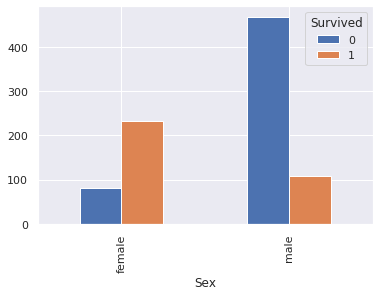

In [6]:
# Sex
## Number of passengers who survived based on gender
sex_survive = train_data.groupby(['Sex', 'Survived']) ['Survived'].count()
sex_survive.unstack().plot(kind='bar')

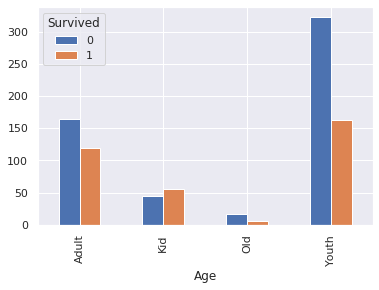

In [7]:
# Age
# Replace NaN value with the mode
train_data.fillna({'Age': 24}, inplace=True)

## Convert the ages to categories
def age_category(age):
    if age > 0 and age <= 16:
        return 'Kid'
    elif age > 16 and age <= 30:
        return 'Youth'
    elif age > 30 and age <= 60:
        return 'Adult'
    elif age > 60:
        return 'Old'
    
train_data['Age'] = train_data['Age'].apply(age_category)

# Number of passengers who survived according to age category
age_category_num = train_data.groupby(['Age', 'Survived']) ['Survived'].count()
age_category_num.unstack().plot.bar()

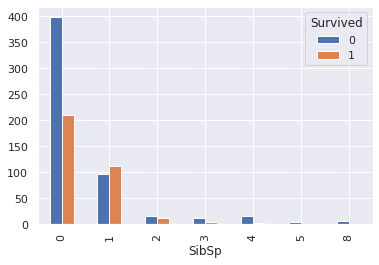

In [8]:
# SibSp
# Number of siblings/spouses who survived
sibsp_survived = train_data.groupby(['SibSp', 'Survived']) ['Survived'].count()
sibsp_survived.unstack().plot.bar()

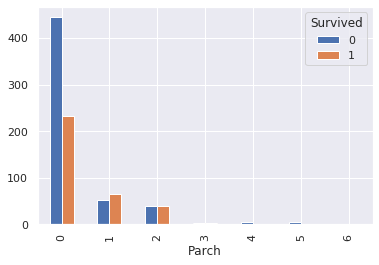

In [9]:
# Parch
# Number of passengers who survived with siblings/spouses on board
parch_survived = train_data.groupby(['Parch', 'Survived']) ['Survived'].count()
parch_survived.unstack().plot.bar()

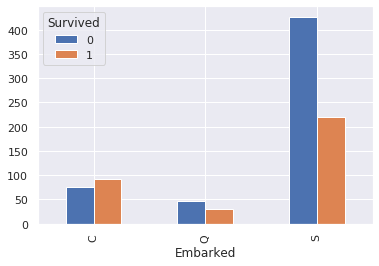

In [10]:
# Embarked
# Fill NaN values with the mode
train_data.fillna({'Embarked': 'S'}, inplace=True)

# Number of passengers who survived based on port of embarkation
embarked_survived = train_data.groupby(['Embarked', 'Survived']) ['Survived'].count()
embarked_survived.unstack().plot.bar()